**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

Let's show that these formulas indeed describe a discrete distribution.

$$\sum_{k=1}^\infty P(Y=k)=\sum_{k=1}^\infty\frac{1}{k(k+1)(k+2)}=\frac{1}{2}\sum_{k=1}^\infty\left(\frac{1}{k(k+1)}-\frac{1}{(k+1)(k+2)}\right)=\frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$$


$$\sum_{k=-1}^{-\infty} P(Y=k)=\sum_{k=-1}^{-\infty}\frac{1}{(|k|)(|k|+1)(|k|+2)}=\frac{1}{2}\sum_{k=-1}^{-\infty}\left(\frac{1}{|k|(|k|+1)}-\frac{1}{(|k|+1)(|k|+2)}\right)=\frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$$

Let's show now that $EY = 0$.
Since the distribution is symetric in regard to 0 and the probability of getting positive number is the same as negative, the $EY$ is equal to 0.

Now let's show that $Y$ has no variation.

$$Var=EY^2-(EY)^2=\sum_{k=1}^\infty\frac{k^2}{k(k+1)(k+2)}-0^2=\sum_{k=1}^\infty\frac{k}{(k+1)(k+2)}\sim\sum_{k=1}^\infty\frac{1}{k}=+\infty$$

Since the defining series is not absolutely convergent we can deduce that $Y$ has no variation.

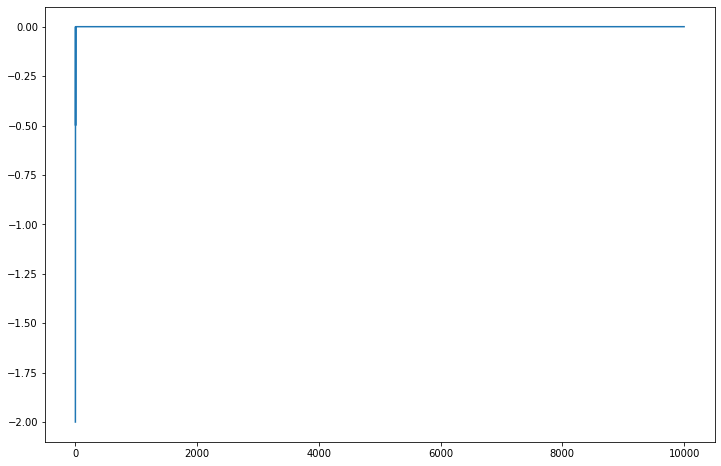

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000

def get_sign():
    rand_num = np.random.randint(4)
    if rand_num <= 1:
        return 0
    elif rand_num == 2:
        return 1
    else:
        return -1

def p(k):
    return 1 / 2 if k == 0 else 1 / (abs(k) * (abs(k) + 1) * (abs(k) + 2))

def get_x(z):
    x = 0
    while z >= 0:
        x += 1
        z -= 4*p(x)

    return x


def sample():
    z = np.random.uniform()

    return get_sign() * get_x(z)

x = np.arange(-10, 11)
y = np.vectorize(p)(x)

plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.show()

# Means
num_list = np.arange(1, N + 1)
samples = np.array([sample() for _ in num_list])
means = np.cumsum(samples).astype(np.float32) / num_list

plt.figure(figsize=(12,8))
plt.plot(num_list, means)
plt.show()

# Medians
medians = [np.median(samples[:i]) for i in num_list]

plt.figure(figsize=(12,8))
plt.plot(num_list, medians)
plt.show()